<a href="https://colab.research.google.com/github/EstevahnAguilera/Data-Science-Projects/blob/main/Video_Games_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let's imagine that it's December 2016 and you're planning a campaign for 2017.

The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Data Description
- Name

- Platform

- Year_of_Release

- Genre

- NA_sales (North American sales in USD million)

- EU_sales (sales in Europe in USD million)

- JP_sales (sales in Japan in USD million)

- Other_sales (sales in other countries in USD million)

- Critic_Score (maximum of 100)

- User_Score (maximum of 10)

- Rating (ESRB)

Data for 2016 may be incomplete.

## Getting Started
I will begin by setting up the environment.
### Importing Libraries
I will import the necessary libraries.

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [1]:
# Importing files from local computer
from google.colab import files
uploaded = files.upload() # games

Saving games.csv to games.csv


In [4]:
# Loading the dataset
games = pd.read_csv('games.csv')

In [6]:
# Analyzing the data
print(games.info(), '\n')
print(games.head(), '\n')
print("Is there any duplicated values? " , games.duplicated().any()) # Checking if there are any duplicated entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None 

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     

## Data Preparation

### Standardizing Column Names

In [7]:
# Converting column names to lowercase
games.rename(columns = {
    #I left the country abbreviations uppercase since they are names!
    'Name' : 'name',
    'Platform' : 'platform',
    'Year_of_Release' : 'year_of_release',
    'Genre' : 'genre',
    'Other_sales' : 'other_sales',
    'Critic_Score' : 'critic_score',
    'User_Score' : 'user_score',
    'Rating' : 'rating'
}, inplace = True)

# Verifying the changes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Data Type Conversion
- I am changing the data type of 'year_of_release' to int since years are portrayed
in whole numbers, not floats. For example, there is no such thing as the year
'1999.5'.
- I am changing the data type of 'critic_score' to int because the numeric values
are in int format, not float. Also, 'Int64' keeps values that are 'NaN' as NA.
- I am changing the data type of 'user_score' to float since the values are numeric,
not strings.

In [8]:
# Changing the datatype of year_of_release to int
games['year_of_release'] = games['year_of_release'].astype('Int64')

# Changing critic_score to int
games['critic_score'] = games['critic_score'].astype('Int64')

# Changing user_score to float
games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')

# Verifying the changes
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


In [9]:
# Checking to see if there are any TBD values in my games DataFrame
# Finding TBD values in my dataset
print((games == 'TBD').sum())

name               0
platform           0
year_of_release    0
genre              0
NA_sales           0
EU_sales           0
JP_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: Int64


### Handling missing values

In [10]:
# Examining missing values
print(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [11]:
# Calculating the percentage of missing values
missing_data_percentage = (games.isnull().sum() / len(games)) * 100
print(missing_data_percentage)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


### Looking at rows with missing values

In [12]:
# Looking at the rows that have missing names
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [13]:
# # Looking at the rows that have missing years
games.loc[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [14]:
# Looking at the rows that have missing genre
games.loc[games['genre'].isnull()]


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [15]:
# Looking at the rows that have missing critic score
games.loc[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [16]:
# Looking at the rows that have missing user score
games.loc[games['user_score'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [17]:
# Looking at the rows that have missing ratings
games.loc[games['rating'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


### Fixing rows with missing values
- I noticed that for some of the rows that have missing release years,
the name contains the year it was released. Thus, I plan on splicing the year
out of the name and using that value for the year of release.
- I have noticed that there is a pattern. When there is missing values, there is
missing values in other columns as well. It is usually the critic score,
user score, and the ratings.
- I will also not fill in the null values for the 'critic_score' and 'user_score' with the median value as they are missing more than half of the data which can result in distorting the distribution and weaken the validity of correlations or hypothesis tests.


In [27]:
# Handling missing values based on analysis

# Creating a copy of the original dataframe
clean_games = games.copy()

# Name and Genre missing values -> Drop them
# The rows that have missing names and genres are the same rows
clean_games = clean_games[clean_games['name'].notna()].copy()

# Year of release -> splice the year out of the name if applicable
# Extract years from game names where year_of_release is missing
missing_year_mask = clean_games['year_of_release'].isnull()
# Use str.extract with the regex and convert to numeric, coercing errors to NaN
# Refined regex to extract 4-digit years starting with 19 or 20
extracted_years = clean_games.loc[missing_year_mask, 'name'].str.extract(r'\b(19\d{2}|20\d{2})\b', expand=False)
extracted_years = pd.to_numeric(extracted_years, errors='coerce')

# Fill missing years with extracted years from name, if available and valid
clean_games.loc[missing_year_mask, 'year_of_release'] = clean_games.loc[missing_year_mask, 'year_of_release'].fillna(extracted_years)

# Changing the years where they equal 0 back to NA value (This might not be necessary after extraction)
# Re-evaluate if year 0 is possible or a placeholder for missing after extraction. Assuming it's not possible.
# If 0 appears, it might indicate an extraction issue or data anomaly.
# For now, I will keep this line but it might need removal later depending on data analysis results.
clean_games.loc[clean_games['year_of_release'] == 0, 'year_of_release'] = pd.NA


# Not filling the null values for critic_score and user_score with the median value as they are missing more
# than half of the data.

# Critic score missing values -> Keep as NA
# User score missing values -> Keep as NA

# Rating missing values -> "Not Rated"
clean_games['rating'] = clean_games['rating'].fillna('Not Rated')

# Verifying the changes by checking for null values
print(clean_games.isnull().sum())

name                  0
platform              0
year_of_release     252
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64


In [28]:
# Grouping the data by console name and looking at the missing values
print(games[['critic_score', 'user_score', 'rating']].isnull().groupby(games['name']).sum())

                              critic_score  user_score  rating
name                                                          
 Beyblade Burst                          1           1       1
 Fire Emblem Fates                       1           1       1
 Frozen: Olaf's Quest                    2           2       2
 Haikyu!! Cross Team Match!              1           1       1
 Tales of Xillia 2                       0           0       0
...                                    ...         ...     ...
thinkSMART: Chess for Kids               1           1       0
uDraw Studio                             0           1       0
uDraw Studio: Instant Artist             1           1       0
wwe Smackdown vs. Raw 2006               1           1       1
¡Shin Chan Flipa en colores!             1           1       1

[11559 rows x 3 columns]


Explain why you filled in the missing values as you did or why you decided to leave them blank.

**Here is what I did:**
  1. I went ahead and looked at the rows where there were missing names. Upon looking at them, I noticed that they didn't have much significance to the data as they were also missing other information such as the genre of the game. Thus, I went ahead and removed the two rows.

  2. After analysing the data where the year of release was missing, I noticed that some of the values in the name column, contained the year in which the game was release. Thus, I went ahead and extracted that year, and I replaced the 'NaN' value with the year that was stated in the name. As far as the other rows that has missing years and they didn't have a year in the name, I went ahead
  and left it blank as the year is an important part of this data, and it wouldn't be a smart decision to replace the 'NaN' values, with the median year or average year.

  3. Previously I had filled the null values in critic score and user score with the median value, but since there is more than half of the data missing in these columns, its important to leave it blank as filling the null values with the median values could distort the distribution and weaken the validity of correlations or hypothesis tests.

  4. When it came to the missing ratings, I went ahead and replaced the 'NaN' values with 'Not Rated' as it made more sense to leave it blank but I also changed it so that the average person sees 'Not Rated' as opposed to 'NaN'. I also didn't want to fill it with the average rating or the median rating since each game is different. For example if the median value or average value is 'everyone' and I classified a game that has violence as everyone just because it was the average or the median value, that wouldn't be good.


### Calculate total sales

In [29]:
# Calculate total sales across all regions and put them in a different column
clean_games['total_sales'] = clean_games[['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']].sum(axis = 1)

print(clean_games.head())

                       name platform  year_of_release         genre  NA_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   EU_sales  JP_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45            76         8.0          E   
1      3.58      6.81         0.77          <NA>         NaN  Not Rated   
2     12.76      3.79         3.29            82         8.3          E   
3     10.93      3.28         2.95            80         8.0          E   
4      8.89     10.22         1.00          <NA>         NaN  Not Rated   

   total_sales  
0        82.54  
1        40.24  
2        35

## Analyzing Video Game Sales Data

### Temporal Analysis of Game Releases

In [30]:
# Creating a DataFrame with game releases by year
games_by_year = clean_games.groupby('year_of_release')['year_of_release'].count()

# Printing the dataframe
print(games_by_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     779
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1427
2010    1255
2011    1137
2012     653
2013     545
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


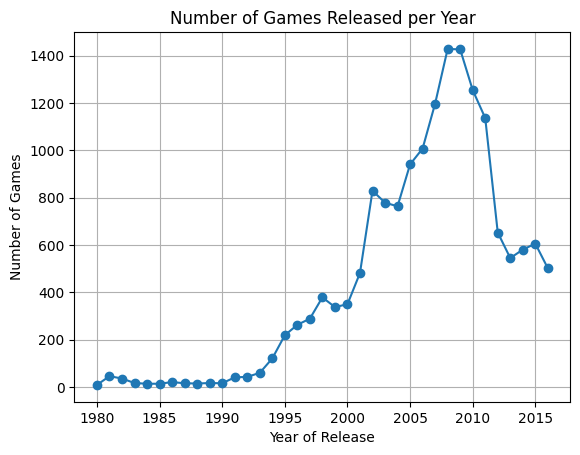

In [31]:
# Visualize the distribution of games across years
games_by_year.plot(kind = 'line', marker = 'o')

plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

In [32]:
# Display summary statistics for each year
summary_stats = clean_games.groupby('year_of_release').describe()

print(summary_stats)

                NA_sales                                                   \
                   count      mean       std   min     25%    50%     75%   
year_of_release                                                             
1980                 9.0  1.176667  1.282624  0.22  0.3200  0.720  1.0700   
1981                46.0  0.726087  0.730885  0.12  0.2925  0.435  0.8925   
1982                36.0  0.747778  1.172248  0.13  0.3150  0.500  0.7225   
1983                17.0  0.456471  0.278903  0.01  0.3100  0.430  0.5100   
1984                14.0  2.377143  7.089785  0.00  0.0450  0.345  0.7700   
1985                14.0  2.409286  7.689309  0.00  0.0000  0.285  0.6025   
1986                21.0  0.595238  0.881542  0.00  0.0000  0.320  0.7100   
1987                16.0  0.528750  0.653094  0.00  0.1350  0.370  0.4875   
1988                15.0  1.591333  2.630154  0.00  0.1000  0.590  1.3700   
1989                17.0  2.655882  5.893720  0.00  0.1400  0.660  0.9600   

### Platform Sales Analysis Over Time

In [34]:
# Calculating total sales by platform and year
platform_sales = clean_games.groupby(['platform', 'year_of_release'])['total_sales'].sum()

print(platform_sales.head())

platform  year_of_release
2600      1980               11.38
          1981               35.68
          1982               28.88
          1983                5.84
          1984                0.27
Name: total_sales, dtype: float64


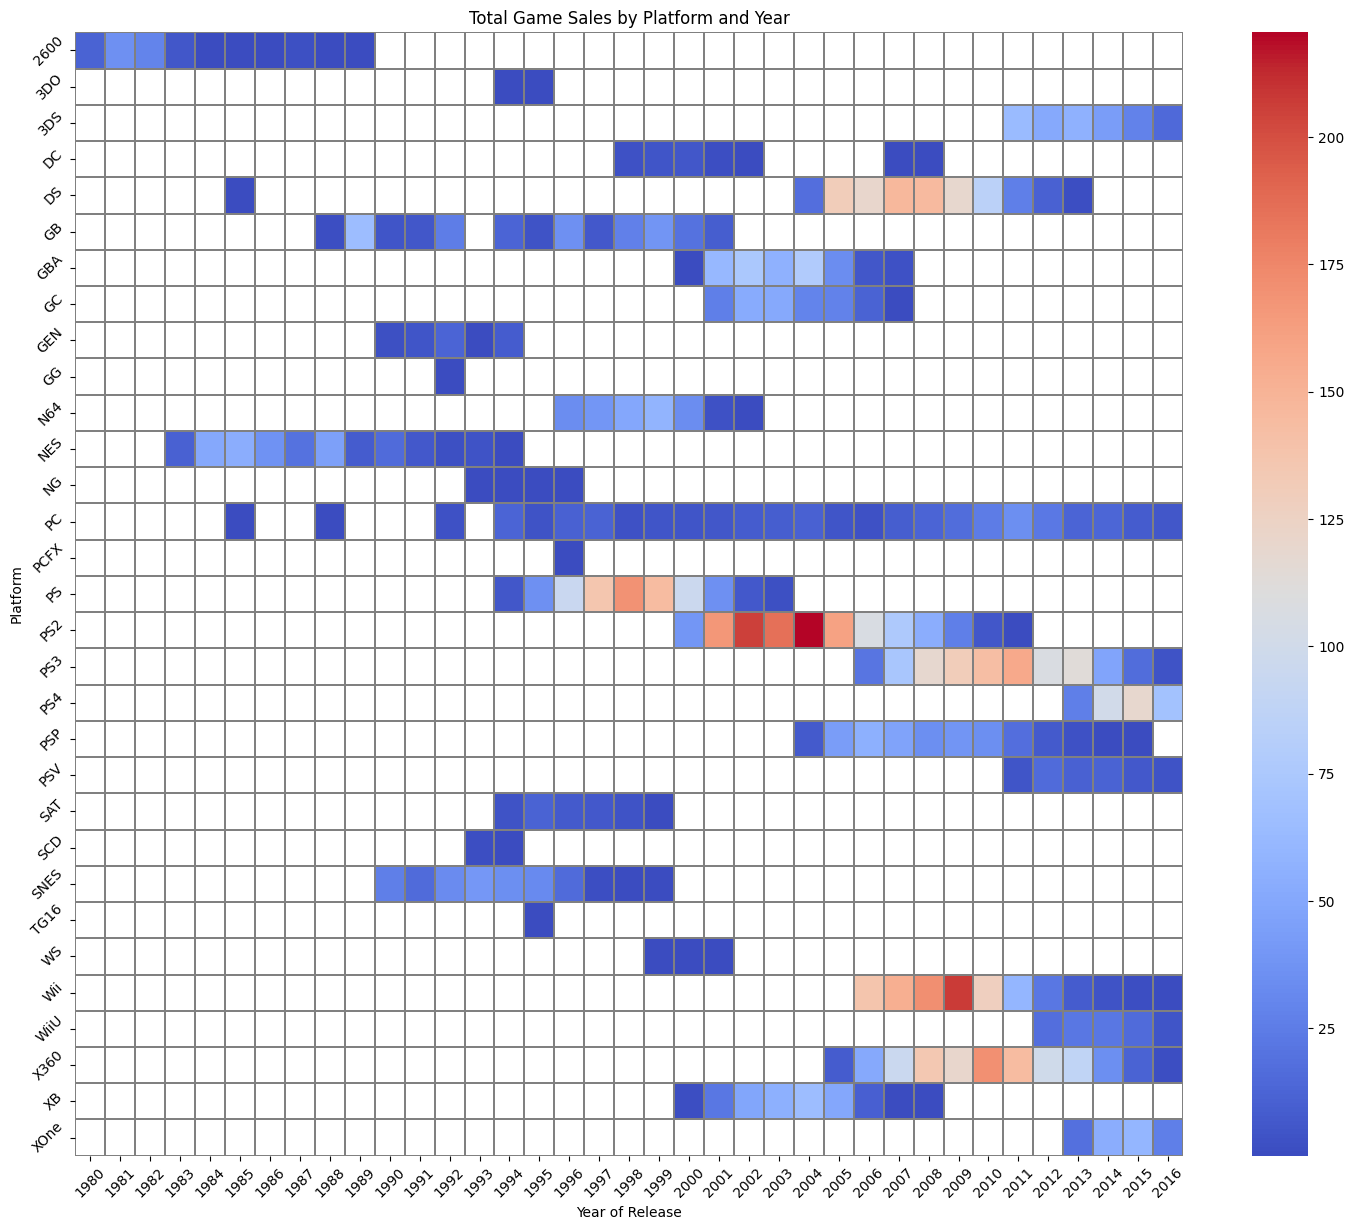

In [35]:
# Creating a heatmap of platform sales over time


# Pivoting my table
platform_sales_pivot = platform_sales.unstack()

n_rows, n_cols = platform_sales_pivot.shape
row_height = 0.4
col_width = 0.4

plt.figure(figsize=(n_cols * col_width, n_rows * row_height))

sns.heatmap(platform_sales_pivot,
            cmap = 'coolwarm',
            annot = False,
            linecolor = 'grey',
            square = False,
            linewidths=0.3
           )
plt.title('Total Game Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Identifying platforms with declining sales

Based on the heatmap above, the following platforms had declining sales:
- DS: Rised in 2005, declines by 2010
- PS: Rised in 1995, declines by 2001
- PS2: Rised in 2001, declines by 2007
- PS3: Rised in 2007, declines by 2014
- PS4: Rised in 2014, declines start in 2016
- Wii: Rised in 2006, declines by 2011
- X360: Rised in 2006, declines by 2014

Platforms that show consistent sales over time:
- PC: They have been in the cool since 1995 and onwards

Platforms that have disappeared from the market:
- 2600: Disappeared in 1990
- 3DO: Disappeared in 1996
- DC: Disappeared in 2003, came back in 2007 and disappeared in 2009.
- DS: Disappeared in 1986, came back in 2004 and sales were staring to boom, but then they disappeared in 2013.
- GB: Disappeared in 2002.
- GBA: Disappeared in 2008
- GC: Disappeared in 2008
- Gen: Disappeared in 1995
- GG: Disappeared in 1992
- N64: Disappeared in 2003
- NES: Disappeared in 1995
- NG: Disappeared in 1997
- PCFX: Disappeared in 1997
- PS: Disappeared in 2004
- PS2: Disappeared in 2012
- PSP: Disappeared in 2015
- SAT: Disappeared in 2000
- SCD: Disappeared in 1995
- SNES: Disappeared in 2000
- TG16: Disappeared in 1996
- WS: Disappeared in 2002
- XB: Disappeared in 2009

Typical lifecycle of a game is about 10 years.

### Determining Relevant Time Period

In [36]:
# Your code here to filter the dataset to relevant years
relevant_years = list(range(2006, 2017))
games_relevant = clean_games[clean_games['year_of_release'].isin(relevant_years)]

Justify your choice with data

- The years I decided to go with were 2006-2016. The reason why I went with this
is because it is 10 years worth of data that had strong sales across multiple
platforms according to the heatmap. It also is recent enough to predict 2017
trends as well.

- Considering that in 2017, there was the introduction to multiple consoles. Thus,
looking at the heatmap, I noticed that there were multiple consoles that had a
good amount of sales during this time. With that being said, because of these
new consoles, it could be a possibility that it can happen again. The consoles
that were coming about at this time were from the brands Xbox, Playstation, and  
Nintendo. Now, going back to the heatmap, the consoles that had the most sales
were again, Playstation, Xbox, and Nintendo.

- What influenced my decision was the heatmap analysis which was showing strong
sales before and after 2006, but within this time frame, there was 4 platforms
that were selling a lot. Not only that, but I wanted data that was recent enough
to predict the following year.

### Platform Performance Analysis

In [37]:
# Sort platforms by total sales
total_sales_by_platform = games_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

print(total_sales_by_platform)

platform
X360    953.05
PS3     931.34
Wii     891.18
DS      655.36
PS4     314.14
PS2     268.84
3DS     257.81
PSP     239.44
PC      163.77
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64


/tmp/ipython-input-2820466126.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_platform.values, y=total_sales_by_platform.index, palette='viridis')


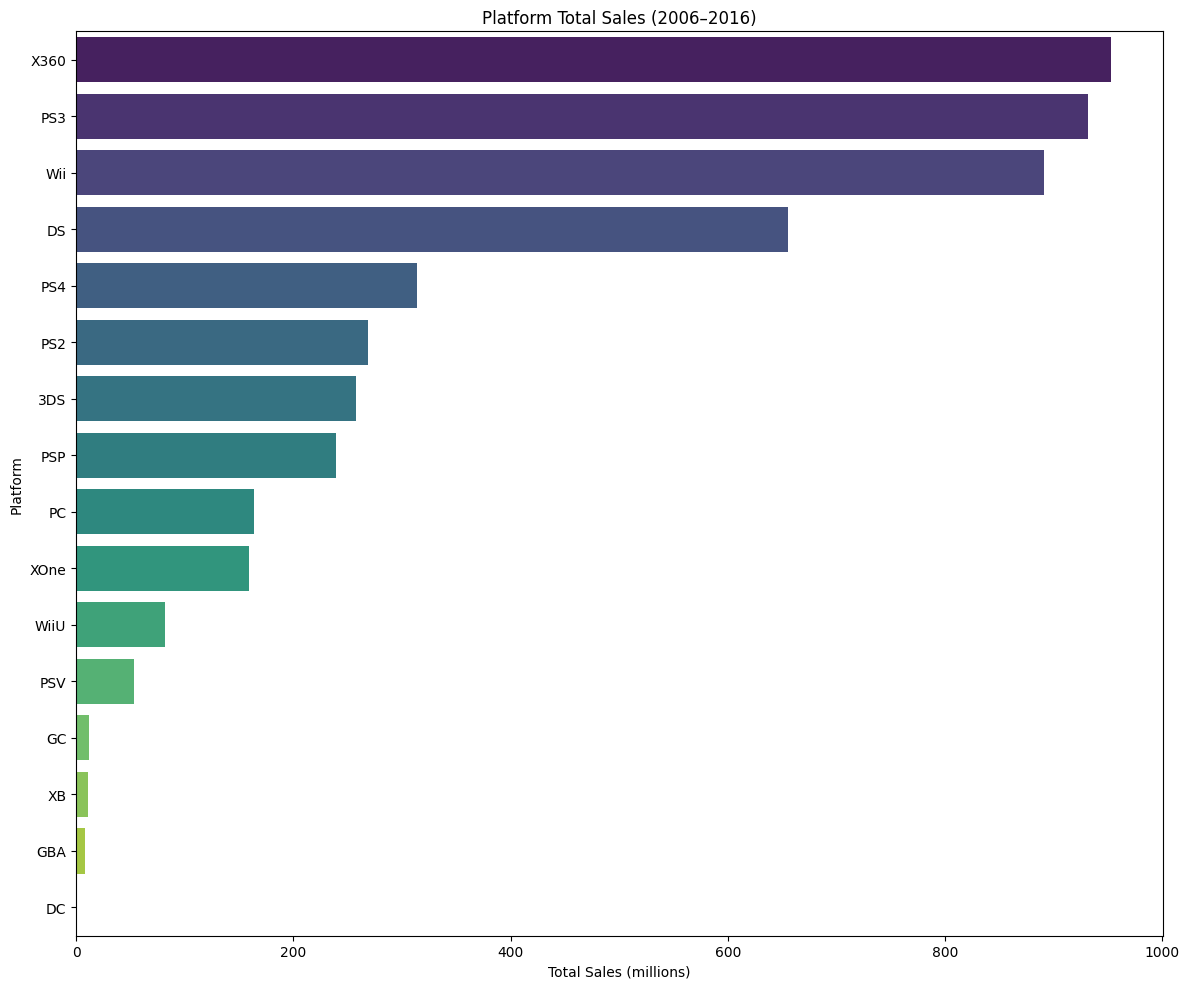

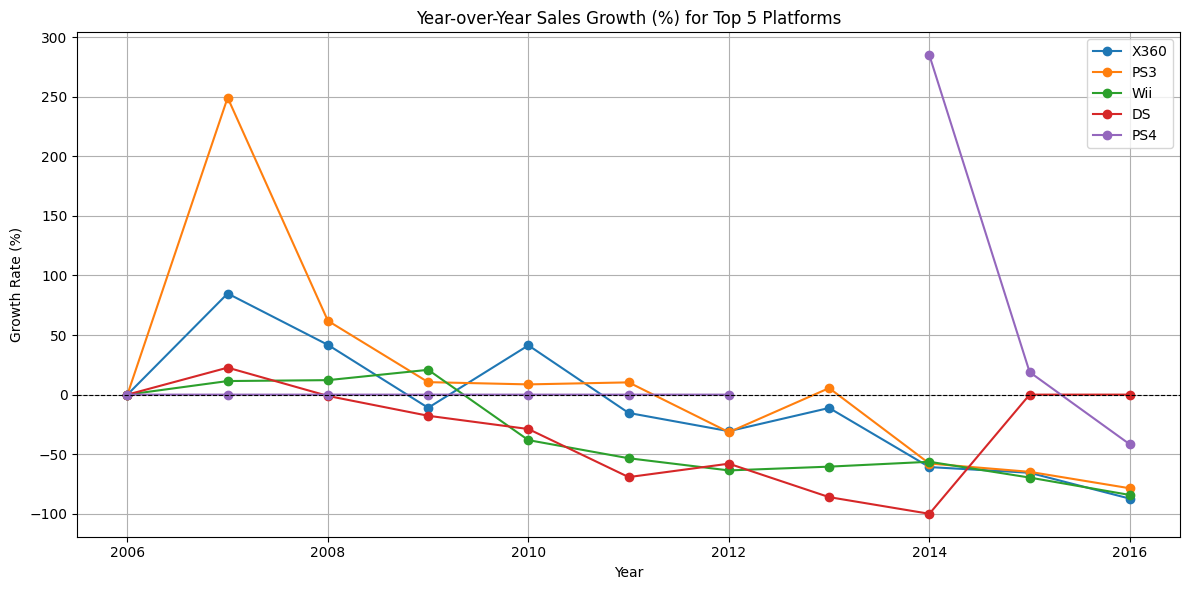

In [38]:
# Visualizing the platforms
plt.figure(figsize=(12, 10))
sns.barplot(x=total_sales_by_platform.values, y=total_sales_by_platform.index, palette='viridis')
plt.title('Platform Total Sales (2006–2016)')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# Calculate year-over-year growth for each platform

# Group sales by platform and year
sales_by_year = games_relevant.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Pivot for time series
sales_pivot = sales_by_year.pivot(index='year_of_release', columns='platform', values='total_sales').fillna(0)

# Calculate year over year growth percentage
platform_growth_pct = sales_pivot.pct_change().fillna(0) * 100

# Your code here to calculate and visualize platform growth rates

# I only did the top 5 for a better visual representation
top_5_platforms = total_sales_by_platform.head(5).index
growth_top_5 = platform_growth_pct[top_5_platforms]

plt.figure(figsize=(12, 6))
for platform in top_5_platforms:
    plt.plot(growth_top_5.index, growth_top_5[platform], marker='o', label=platform)

plt.title('Year-over-Year Sales Growth (%) for Top 5 Platforms')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales Distribution Analysis

/tmp/ipython-input-2137158277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=games_relevant, x='platform', y='total_sales', palette='Set3')


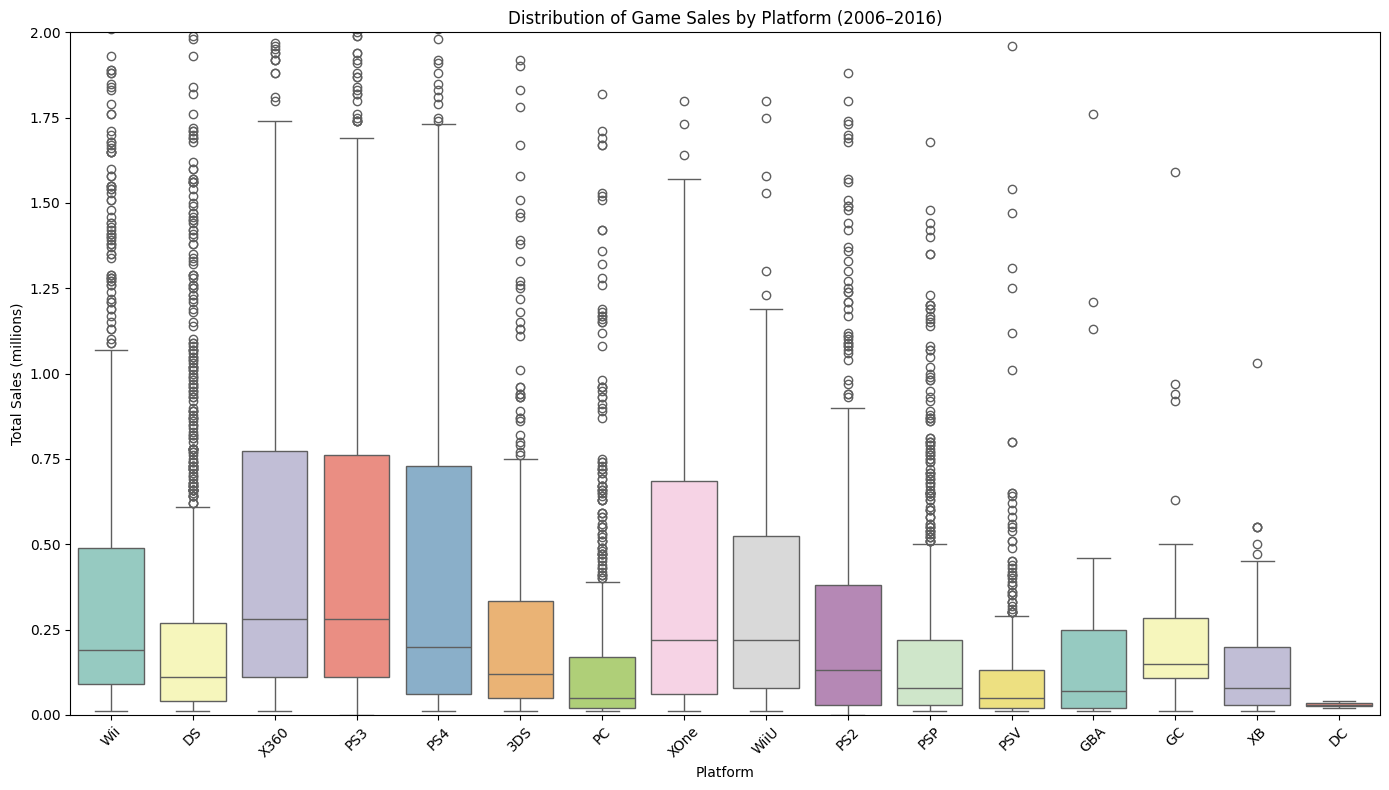

In [39]:
# Creating a box plot of sales by platform
plt.figure(figsize=(14, 8))
sns.boxplot(data=games_relevant, x='platform', y='total_sales', palette='Set3')

plt.title('Distribution of Game Sales by Platform (2006–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.ylim(0, 2) # Added this to avoid outliers
plt.tight_layout()
plt.show()

In [40]:
# Calculate detailed statistics for each platform
platform_stats = games_relevant.groupby('platform')['total_sales'].describe()

print(platform_stats)

           count      mean       std   min     25%   50%     75%    max
platform                                                               
3DS        512.0  0.503535  1.441271  0.01  0.0500  0.12  0.3325  14.60
DC           2.0  0.030000  0.014142  0.02  0.0250  0.03  0.0350   0.04
DS        1980.0  0.330990  1.087915  0.01  0.0400  0.11  0.2700  29.80
GBA         45.0  0.192889  0.346276  0.01  0.0200  0.07  0.2500   1.76
GC          44.0  0.262045  0.308994  0.01  0.1075  0.15  0.2850   1.59
PC         777.0  0.210772  0.543359  0.01  0.0200  0.05  0.1700   8.01
PS2        807.0  0.333135  0.624265  0.00  0.0300  0.13  0.3800   5.95
PS3       1306.0  0.713124  1.403065  0.00  0.1100  0.28  0.7600  21.05
PS4        392.0  0.801378  1.609456  0.01  0.0600  0.20  0.7300  14.63
PSP       1085.0  0.220682  0.466450  0.01  0.0300  0.08  0.2200   5.49
PSV        429.0  0.125431  0.212341  0.01  0.0200  0.05  0.1300   1.96
Wii       1286.0  0.692986  3.165022  0.01  0.0900  0.19  0.4875

### Review Score Impact Analysis

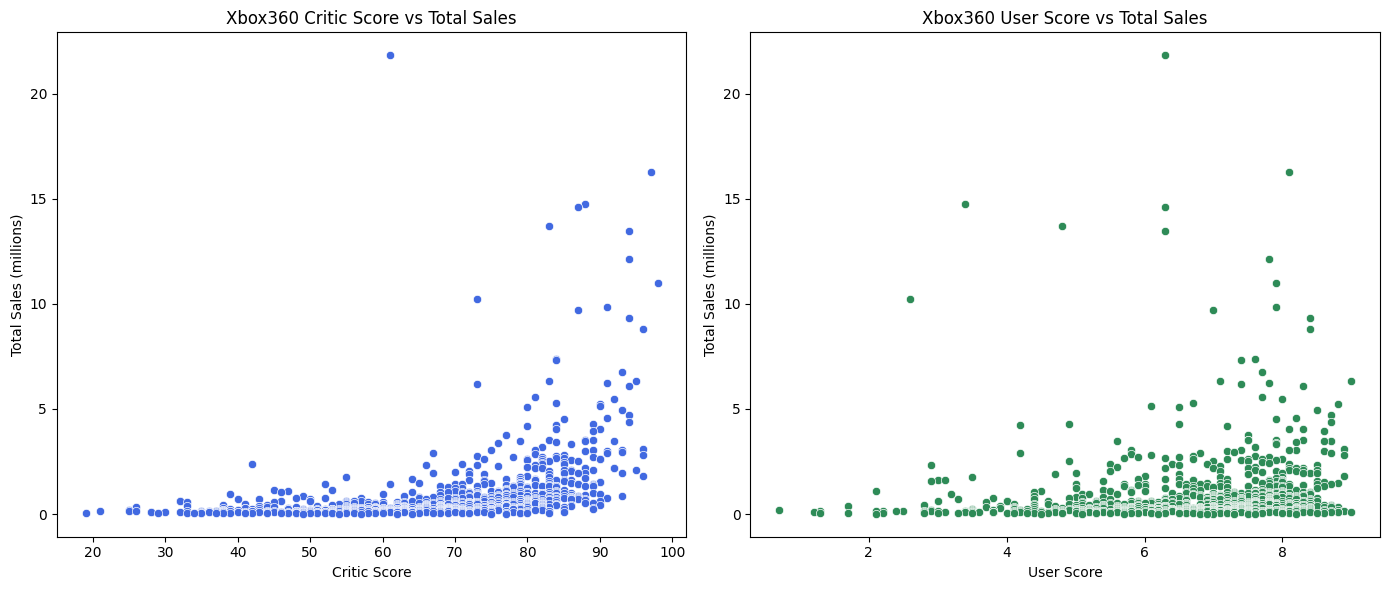

In [41]:
# I will be choosing xbox360 since it is a popular platform

# Creating a scatter plot for both critic and user scores
X360_games = games_relevant[games_relevant['platform'] == 'X360']

plt.figure(figsize=(14, 6))

# Critic Score vs Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=X360_games, x='critic_score', y='total_sales', color='royalblue')
plt.title('Xbox360 Critic Score vs Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')

# User Score vs Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=X360_games, x='user_score', y='total_sales', color='seagreen')
plt.title('Xbox360 User Score vs Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')

plt.tight_layout()
plt.show()

In [42]:
# Make a copy
X360_games_copy = games_relevant[games_relevant['platform'] == 'X360'].copy()

# Critic Scores
Xbox360_critic_score = X360_games_copy['critic_score']

# User Scores
Xbox360_user_score = X360_games_copy['user_score']

# Changing the types
Xbox360_critic_score_clean = Xbox360_critic_score.astype('float64')
Xbox360_user_score_clean = Xbox360_user_score.astype('float64')
total_sales_clean = X360_games['total_sales'].astype('float64')

# Calculate correlations
Critic_corr = Xbox360_critic_score_clean.corr(total_sales_clean)
User_corr = Xbox360_user_score_clean.corr(total_sales_clean)

print(f"Correlation between Critic Score and Total Sales: {Critic_corr:.3f}")
print(f"Correlation between User Score and Total Sales: {User_corr:.3f}")

Correlation between Critic Score and Total Sales: 0.397
Correlation between User Score and Total Sales: 0.115


### Cross-Platform Comparison

In [43]:
# Finding games released on multiple platforms

# Count distinct platforms per game
platform_counts = clean_games.groupby('name')['platform'].nunique()

# Filter games with more than 1 platform
multi_platform_titles = platform_counts[platform_counts > 1].index

# Filter the data so that we have games that are only released on multiple platforms
multi_platform_games = clean_games[clean_games['name'].isin(multi_platform_titles)]


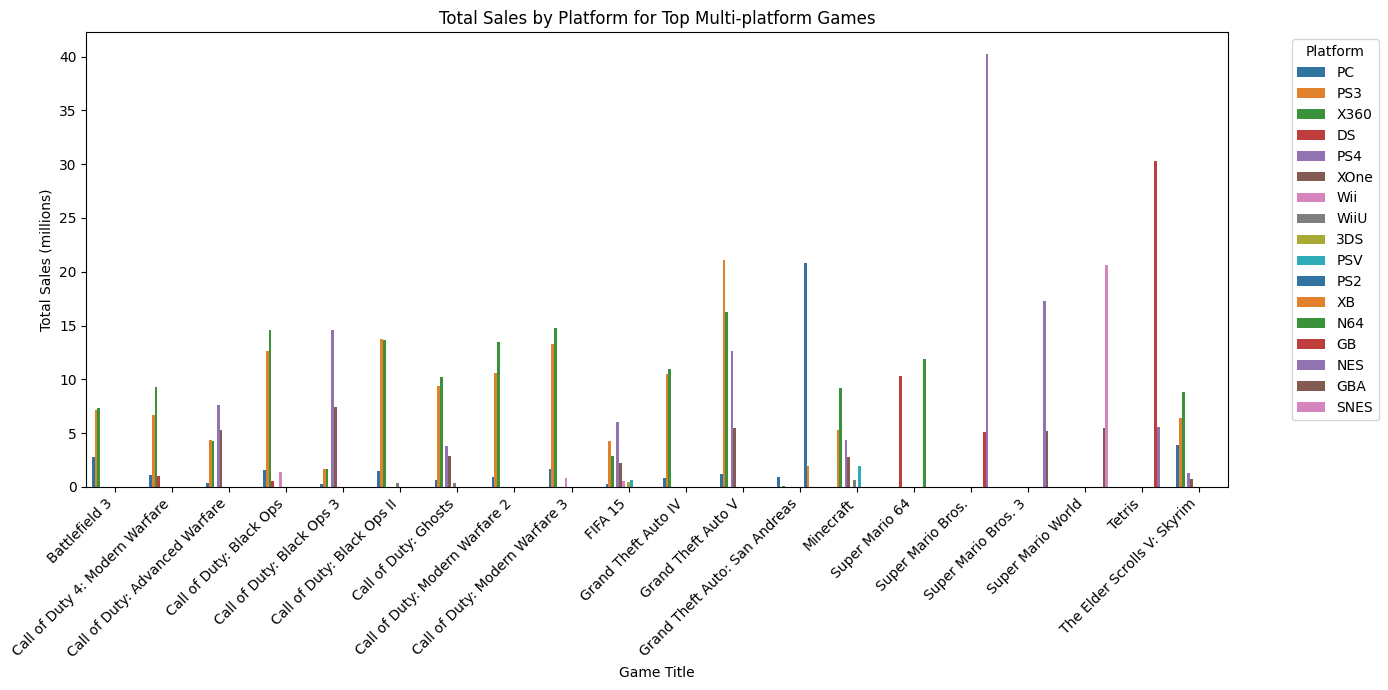

In [45]:
# Comparing sales across platforms for these games
sales_by_game_platform = multi_platform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Pivot the sales
sales_pivot = sales_by_game_platform.pivot(index='name', columns='platform', values='total_sales').fillna(0)

# Analyze and visualize cross-platform performance
# Barplot of the top 20

top_games = (
    sales_by_game_platform
    .groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(20)
    .index
)

top_sales = sales_by_game_platform[sales_by_game_platform['name'].isin(top_games)]

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_sales,
    x='name',
    y='total_sales',
    hue='platform',
    palette='tab10'
)
plt.title('Total Sales by Platform for Top Multi-platform Games')
plt.xlabel('Game Title')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Genre Analysis

In [46]:
# Sort genres by total sales
genre_grouped = clean_games.groupby('genre')['total_sales']

# Calculate total, mean, and median sales per genre
genre_stats = genre_grouped.agg(['sum', 'mean', 'median', 'count']).sort_values(by='sum', ascending=False)

# Print table
print(genre_stats.round(2))

                  sum  mean  median  count
genre                                     
Action        1744.17  0.52    0.19   3369
Sports        1331.27  0.57    0.22   2348
Shooter       1052.45  0.80    0.24   1323
Role-Playing   934.56  0.62    0.18   1498
Platform       827.77  0.93    0.27    888
Misc           802.51  0.46    0.16   1750
Racing         728.67  0.58    0.19   1249
Fighting       447.53  0.53    0.21    849
Simulation     389.97  0.45    0.15    873
Puzzle         242.57  0.42    0.11    580
Adventure      237.59  0.18    0.05   1303
Strategy       174.23  0.26    0.10    683


/tmp/ipython-input-3610618938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['sum'], y=genre_stats.index, palette='viridis')


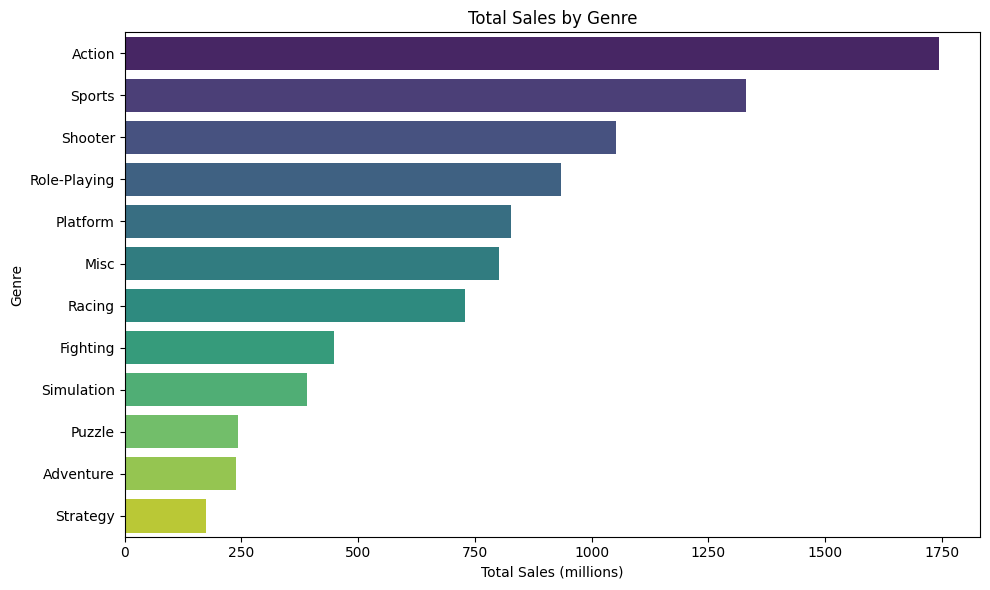

/tmp/ipython-input-3610618938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['mean'], y=genre_stats.index, palette='magma')


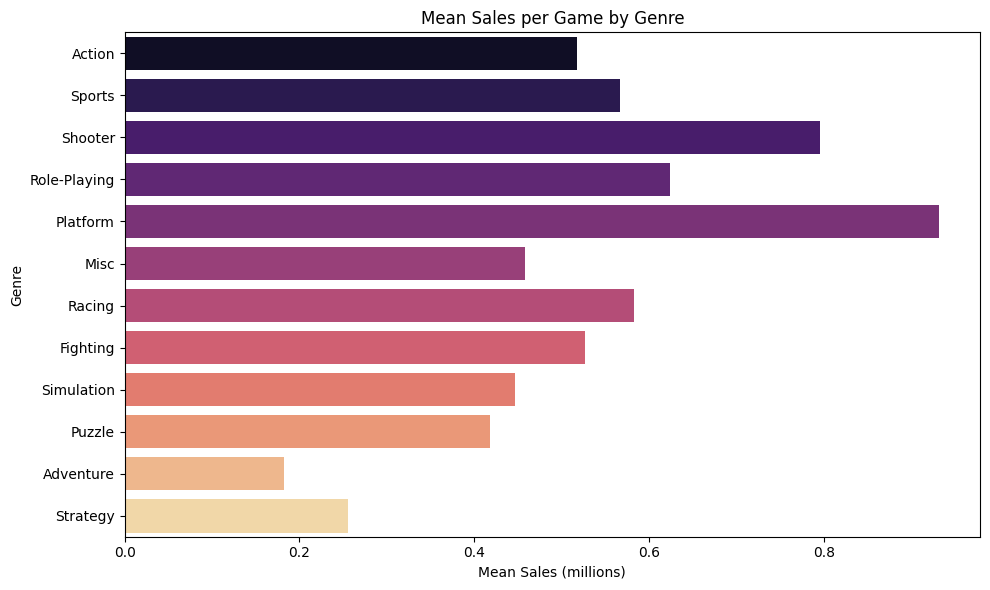

/tmp/ipython-input-3610618938.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats['median'], y=genre_stats.index, palette='coolwarm')


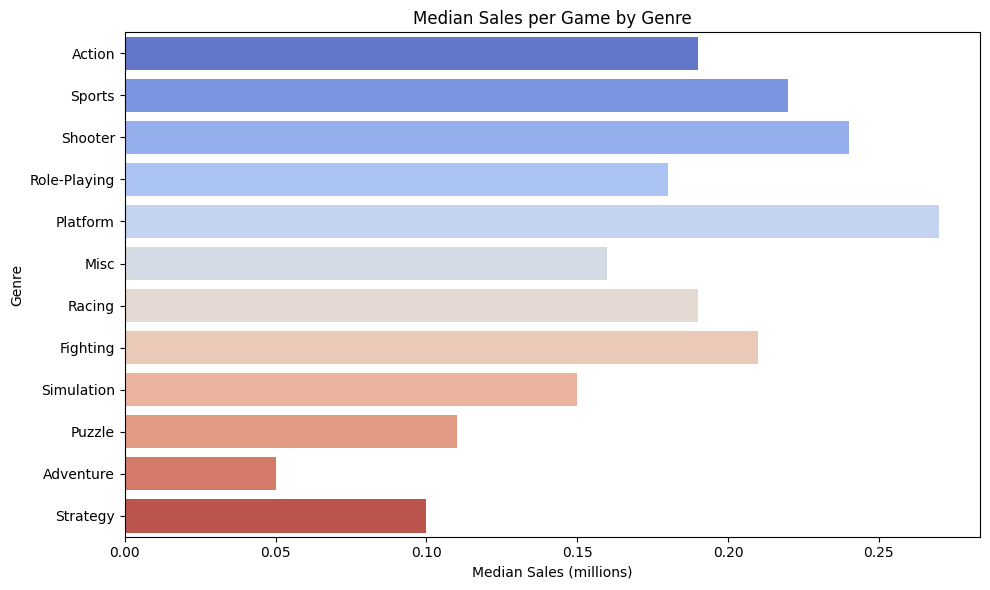

In [47]:
# Visualize genre distribution

# Total Sales Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['sum'], y=genre_stats.index, palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Mean Sales per Game
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['mean'], y=genre_stats.index, palette='magma')
plt.title('Mean Sales per Game by Genre')
plt.xlabel('Mean Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# Median Sales per Game
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_stats['median'], y=genre_stats.index, palette='coolwarm')
plt.title('Median Sales per Game by Genre')
plt.xlabel('Median Sales (millions)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

genre
Action          19.57
Sports          14.94
Shooter         11.81
Role-Playing    10.49
Platform         9.29
Misc             9.00
Racing           8.18
Fighting         5.02
Simulation       4.38
Puzzle           2.72
Adventure        2.67
Strategy         1.95
Name: sum, dtype: float64


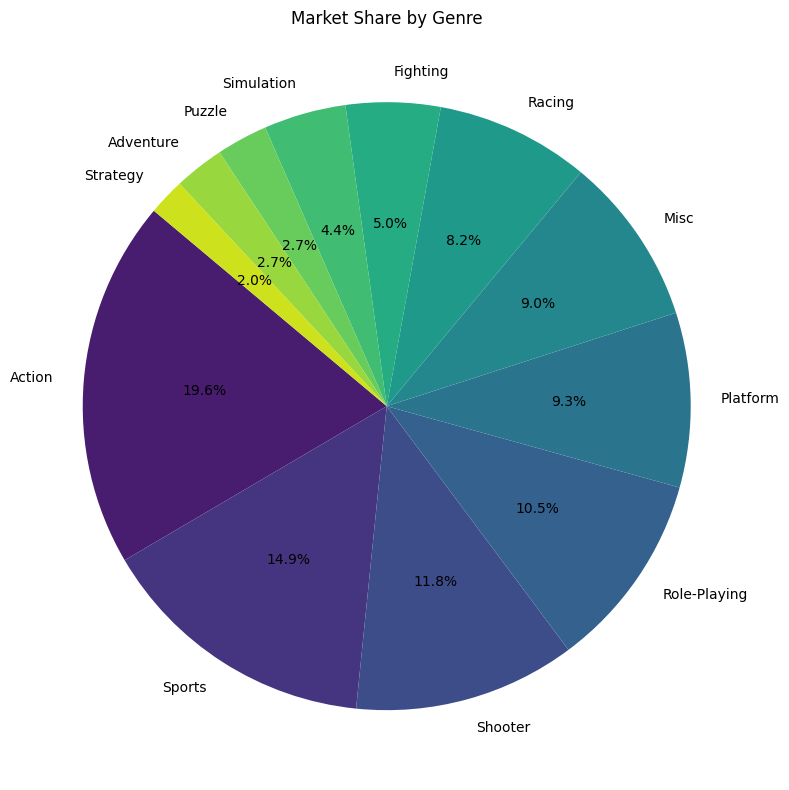

In [48]:
# Calculate market share for each genre
genre_market_share = (genre_stats['sum'] / genre_stats['sum'].sum()) * 100

# Show percentages
print(genre_market_share.round(2))

# Making a piechart
plt.figure(figsize=(8, 8))
plt.pie(genre_market_share, labels=genre_market_share.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(genre_market_share)))
plt.title('Market Share by Genre')
plt.axis('equal')  # Keeps pie circular
plt.tight_layout()
plt.show()

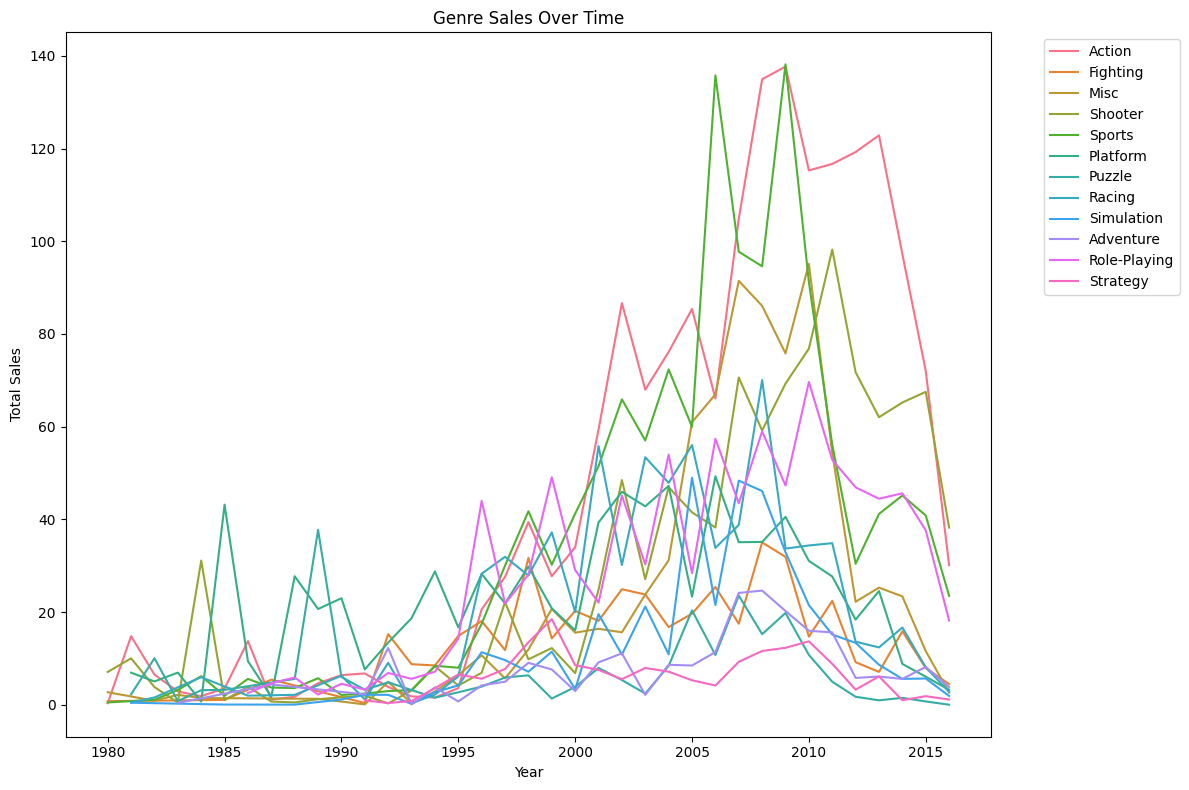

In [49]:
# Group by year and genre
yearly_sales = clean_games.groupby(['year_of_release', 'genre'])['total_sales'].sum().reset_index()

# Plot genre trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_sales, x='year_of_release', y='total_sales', hue='genre')
plt.title('Genre Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

After looking at the Total Sales, Mean, and Median I made these
observations for the top 5:
  - Shooter games has a high average(mean) & decent volume(median). They also have a high total sales value as well.
  - Platform games has a very high per-title performance as their mean value is 0.93.
  - Sport games have a high volume due to the high value of total sales, but they have a good average.
  - Role-Playing games have a good average and a good amount of sales.
  - Action games have a large volume, but they have a decent average.

After viewing the line plot, I made these observations:
  - Action reached the highest peak, but declined after 2010
  - Sports peaked in 2005, but declined before 2010
  - Shooter started climbing before 2005, but declined in 2010
  - Platform & Puzzle games did really well in 1980s - 1990s,
  and they were also consistent in the 2000s, but they declined before 2010.
  - Racing and Role-Playing showed similar growth till 2010
  - Adventure & Strategy had low sales overall.

Top Average Performers:
  - Platform is #1 in both mean and median which shows consistently high per-game profitability.
  - Shooter, Role-Playing, and Sports also perform
  strongly.

Moderate Performers:
  - Action sells a lot in total, but due to its huge number
  of titles, its average per game is only mid-level.
  - Racing, Fighting, and Misc do okay, especially if you
  want solid performers that aren't extreme.

Low Average Performers:
  - Adventure and Strategy have the lowest mean and median
  sales per game.

## Regional Market Analysis and User Profiles

### Regional Platform Analysis

In [50]:
# Function to analyze platform performance by region
def platform_sales_by_region(df, region_col,):
    region_sales = df.groupby('platform')[region_col].sum().sort_values(ascending=False)
    return region_sales

In [51]:
# Analyze each region
top_na = platform_sales_by_region(clean_games, 'NA_sales')
top_eu = platform_sales_by_region(clean_games, 'EU_sales')
top_jp = platform_sales_by_region(clean_games, 'JP_sales')
top_other = platform_sales_by_region(clean_games, 'other_sales')


print(top_na.head(5))
print(top_eu.head(5))
print(top_jp.head(5))
print(top_other.head(5))

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: NA_sales, dtype: float64
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: EU_sales, dtype: float64
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: JP_sales, dtype: float64
platform
PS2     193.44
PS3     135.68
X360     85.76
Wii      79.07
DS       59.26
Name: other_sales, dtype: float64


### Cross-Regional Platform Comparison

In [52]:
# Creating a comparative platform analysis
platform_region_comparison = clean_games.groupby('platform')[
    ['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
].sum()

print(platform_region_comparison)

          NA_sales  EU_sales  JP_sales  other_sales
platform                                           
2600         90.60      5.47      0.00         0.91
3DO           0.00      0.00      0.10         0.00
3DS          83.49     61.48    100.67        13.36
DC            5.43      1.69      8.56         0.27
DS          382.40    188.89    175.57        59.26
GB          114.32     47.82     85.12         8.20
GBA         187.54     75.25     47.33         7.73
GC          133.46     38.71     21.58         5.18
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         139.02     41.06     34.22         4.38
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           94.53    142.44      0.17        22.38
PCFX          0.00      0.00      0.03         0.00
PS          336.52    213.61    139.82        40.91
PS2         583.84    339.29    139.20       193.44
PS3         

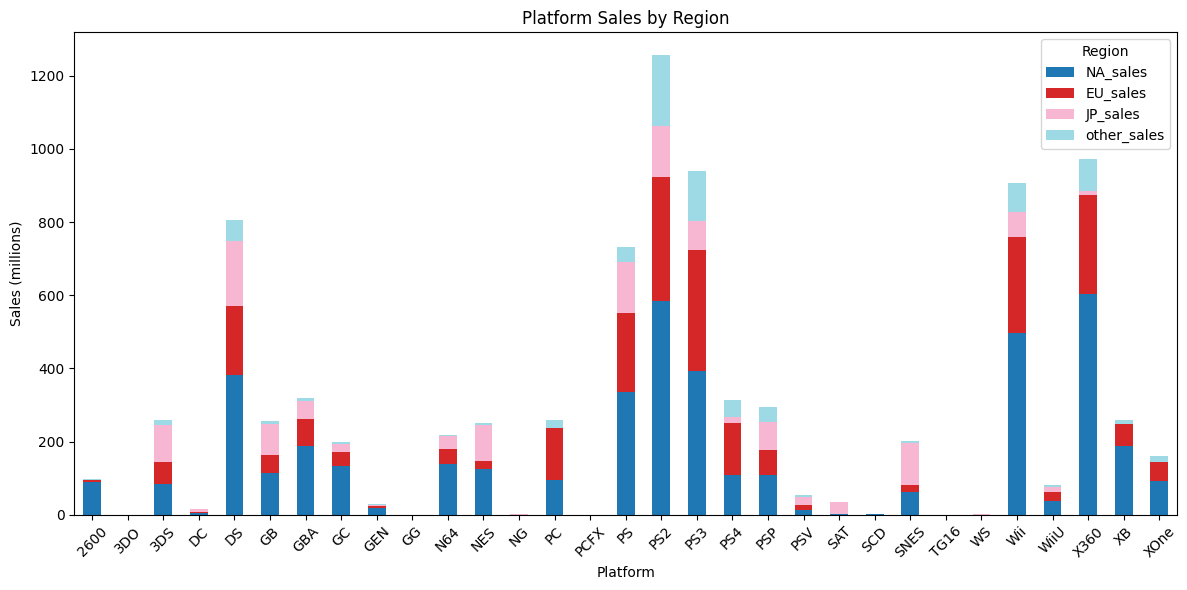

In [53]:
# Visualizing cross-regional comparison for top platforms
platform_region_comparison.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.title('Platform Sales by Region')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### Regional Genre Analysis

In [54]:
# Function to analyze genre performance by region
def genre_sales_by_region(df, region_col):
    return (
        df.groupby('genre')[region_col]
        .sum()
        .sort_values(ascending=False)
    )

top_na_genre = genre_sales_by_region(clean_games, 'NA_sales')
top_eu_genre = genre_sales_by_region(clean_games, 'EU_sales')
top_jp_genre = genre_sales_by_region(clean_games, 'JP_sales')
top_other_genre = genre_sales_by_region(clean_games, 'other_sales')

print(top_na_genre.head(5))
print(top_eu_genre.head(5))
print(top_jp_genre.head(5))
print(top_other_genre.head(5))

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: NA_sales, dtype: float64
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: EU_sales, dtype: float64
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: JP_sales, dtype: float64
genre
Action     184.60
Sports     134.51
Shooter    104.11
Racing      76.10
Misc        74.39
Name: other_sales, dtype: float64


### Cross-Regional Genre Comparison

              NA_sales  EU_sales  JP_sales  other_sales
genre                                                  
Action          879.01    519.13    161.43       184.60
Adventure       105.26     63.54     52.30        16.49
Fighting        223.36    100.33     87.48        36.36
Misc            407.27    212.74    108.11        74.39
Platform        445.50    200.35    130.83        51.09
Puzzle          122.87     50.01     57.31        12.38
Racing          359.35    236.51     56.71        76.10
Role-Playing    330.81    188.71    355.41        59.63
Shooter         592.24    317.34     38.76       104.11
Simulation      181.92    113.52     63.80        30.73
Sports          684.43    376.79    135.54       134.51
Strategy         68.55     45.17     49.66        10.85


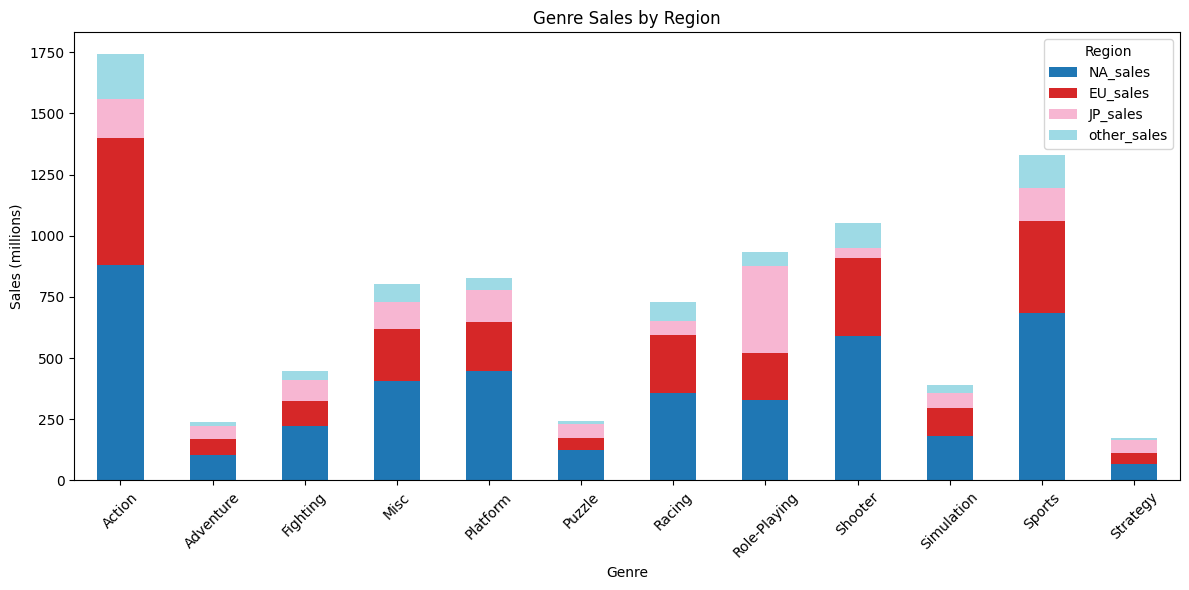

In [55]:
# Creating a comparative genre analysis
genre_region_comparison = clean_games.groupby('genre')[
    ['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
].sum()

print(genre_region_comparison)

# Visual
genre_region_comparison.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.title('Genre Sales by Region')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

### ESRB Rating Impact Analysis

In [56]:
# Function to analyze ESRB rating impact
def rating_sales_by_region(df, region_col):
    return (
        df.groupby('rating')[region_col]
        .sum()
        .sort_values(ascending=False)
    )

top_na_ratings = rating_sales_by_region(clean_games, 'NA_sales')
top_eu_ratings = rating_sales_by_region(clean_games, 'EU_sales')
top_jp_ratings = rating_sales_by_region(clean_games, 'JP_sales')
top_other_ratings = rating_sales_by_region(clean_games, 'other_sales')

print(top_na_ratings.head(5))
print(top_eu_ratings.head(5))
print(top_jp_ratings.head(5))
print(top_other_ratings.head(5))

rating
E            1292.99
Not Rated    1240.68
T             759.75
M             748.48
E10+          353.32
Name: NA_sales, dtype: float64
rating
E            710.25
Not Rated    613.30
M            483.97
T            427.03
E10+         188.52
Name: EU_sales, dtype: float64
rating
Not Rated    841.93
E            198.11
T            151.40
M             64.24
E10+          40.20
Name: JP_sales, dtype: float64
rating
E            234.17
M            177.10
T            155.17
Not Rated    151.00
E10+          73.56
Name: other_sales, dtype: float64


           NA_sales  EU_sales  JP_sales  other_sales
rating                                              
AO             1.26      0.61      0.00         0.09
E           1292.99    710.25    198.11       234.17
E10+         353.32    188.52     40.20        73.56
EC             1.53      0.11      0.00         0.11
K-A            2.56      0.27      1.46         0.03
M            748.48    483.97     64.24       177.10
Not Rated   1240.68    613.30    841.93       151.00
RP             0.00      0.08      0.00         0.01
T            759.75    427.03    151.40       155.17


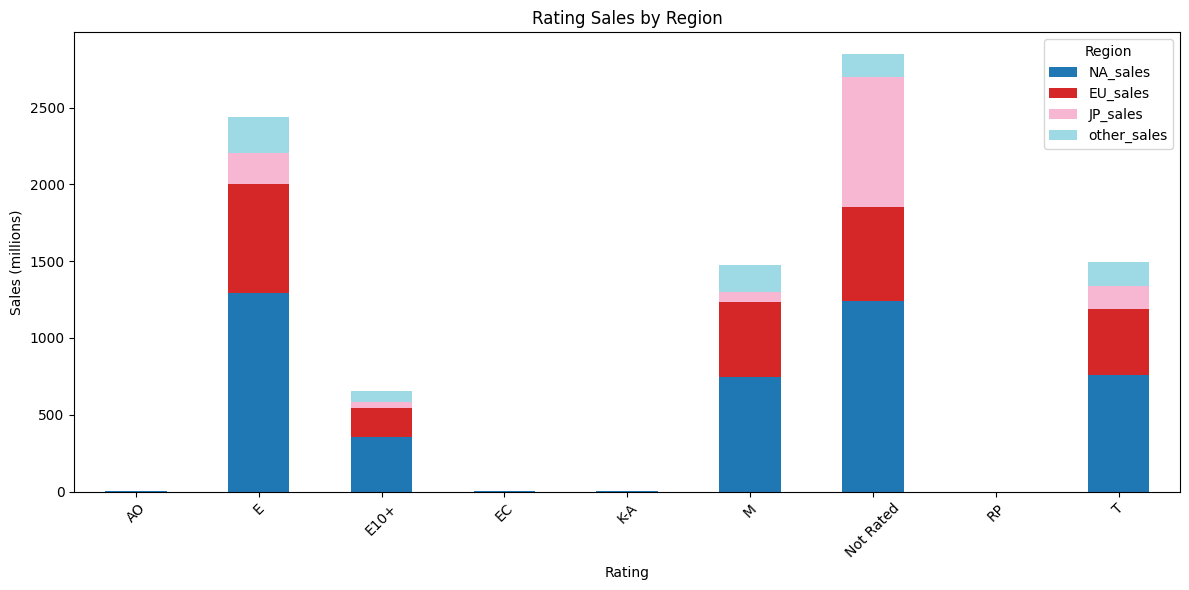

In [57]:
# Analyze ESRB impact for each region
rating_region_comparison = clean_games.groupby('rating')[
    ['NA_sales', 'EU_sales', 'JP_sales', 'other_sales']
].sum()

print(rating_region_comparison)

# Visual
rating_region_comparison.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab20'
)

plt.title('Rating Sales by Region')
plt.xlabel('Rating')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

## Hypothesis Test

In [58]:
# Xbox One vs. PC

# Threshold
alpha = 0.05

# Filter data
xone_ratings = clean_games[(clean_games['platform'] == 'XOne') & (clean_games['user_score'].notna())]['user_score']
pc_ratings = clean_games[(clean_games['platform'] == 'PC') & (clean_games['user_score'].notna())]['user_score']

# Run two-sample t-test
t_stat1, p_val1 = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

# Printing the p-value
print(f"Xbox One vs PC - p-value: {p_val1:.4f}")

# Testing our hypothesis
if p_val1 < alpha:
    print("We reject the null hypothesis: The average user ratings are different.")
else:
    print("We fail to reject the null hypothesis: The average user ratings are the same.")

Xbox One vs PC - p-value: 0.0000
We reject the null hypothesis: The average user ratings are different.


In [60]:
# Action vs. Sports

# Threshold
alpha = 0.05

# Filter data
action_ratings = clean_games[(clean_games['genre'] == 'Action') & (clean_games['user_score'].notna())]['user_score']
sports_ratings = clean_games[(clean_games['genre'] == 'Sports') & (clean_games['user_score'].notna())]['user_score']

# Run t-test
t_stat2, p_val2 = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Printing the p-value
print(f"Action vs Sports - p-value: {p_val2:.4f}")

if p_val2 < alpha:
    print("We reject the null hypothesis: The average user ratings are different.")
else:
    print("We fail to reject the null hypothesis: The average user ratings are the same.")

Action vs Sports - p-value: 0.1148
We fail to reject the null hypothesis: The average user ratings are the same.


I conducted two independent t-tests (Welch’s t-test) to compare user rating averages:
  - H1: The average user rating for Xbox One and PC Platforms is different
  - H2: The average user rating for Action and Sport genres is different

Using a significance level of a = 0.05:
  - For H₁, the p-value = 0.0000. This is below our threshold, so we reject
  the null hypothesis and conclude that Xbox One and PC user ratings are
  significantly different.
  - For H₂, the p-value = 0.7159. This is well above our threshold, so we
  fail to reject the null hypothesis and conclude that Action and Sports
  genres receive similar user ratings.

### Final Project Conclusion
  - This project alalyzed global video game sales between 1980 and 2016 by utilizing data cleaning, transformation, visualization, and hypothesis testing.

Data Preparation & Cleaning
  - Missing values were identified and addressed.
  - Data types were corrected for consistency.
  - Data was filtered to focus on the years 2006 to 2016.
  - New columns were introduced such as 'total_sales' to ensure clean analysis.

Exploratory Findings
  - Platform Performance by Region
      - North America: Xbox 360 and PS2 led the market.
      - Europe: PS2 topped, followed by PS3 and Xbox 360.
      - Japan: Nintendo DS dominated sales.
      - Other Regions: PS2 dominated.

  - Genre Performance by Region
      - Action was the most popular in NA, EU, and other regions.
      - Japan favored Role-Playing games
      - Shooter and Racing games performed well in the West, but had minimal impact in Japan.

  - ESRB Rating Performance by Region
      - NA: E-rating games led, followed by Not Rated.
      - EU: E-rating games led, followed by Not Rated.
      - JP: Not Rated games dominated.
      - Other: E, M, and T ratings showed similar sales.

Stat analysis
  - Correlation Insights
      - Critic Scores had a stronger correlation with total sales than User Scores.

  - Hypothesis Testing
      - Xbox vs. PC
          - p-values = 0.0000 -> Null Hypothesis rejected
          - User ratings for Xbox One and PC are significantly different.
      - Action vs. Sports Genres
          - p-values = 0.7159 -> Fail to reject null hypothesis
          - No significant difference in average user ratings between action and sports games.